In [1]:
# подгружаем необходимые библиотеки
import random

import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest,chi2,RFE
import matplotlib.pyplot as plt
from sklearn. preprocessing import OneHotEncoder

from sklearn. linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsRegressor

from sklearn import svm, datasets

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import RocCurveDisplay

from sklearn.preprocessing import LabelBinarizer

In [2]:
from sklearn. model_selection import train_test_split

In [4]:
danye=pd.read_csv('/content/Данные для модели.csv', error_bad_lines=False,sep=';')

<ipython-input-4-9669122bb1cb>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  danye=pd.read_csv('/content/Данные для модели.csv', error_bad_lines=False,sep=';')


In [5]:
#Проверим заполненность данных и приведем все данные к числовому формату
danye['Квартал'] = pd.to_datetime(danye['Квартал'], format='%d.%m.%Y')
danye.set_index('Квартал', inplace=True)
danye

,Индикатор кризиса,Заказы на промышленную продукцию,Запасы готовой продукции,Загрузка производственных мощностей,Цена нефти на мировом рынке,Реальный курс рубля,Текущее финансовое состояние,Фондовый индекс,Уровень реальных процентных ставок (MIACR от 31 до 90),Денежная масса М2,Валютные резервы
Квартал,,,,,,,,,,,
2005-03-31,0,59.0,46.0,24.0,50.60,28.60,69.0,0.765,4.39,4300.6,138.9
2005-06-30,0,52.0,43.0,28.0,50.70,28.49,70.0,0.765,5.26,4677.7,149.6
2005-09-30,0,50.0,41.0,26.0,50.80,28.75,71.0,0.765,4.10,5118.2,159.6
2005-12-31,0,53.0,45.0,26.0,50.90,27.72,72.0,0.765,7.33,5417.1,182.2
2006-03-31,0,62.0,52.0,26.0,61.09,26.84,74.0,0.831,5.38,5899.7,205.9
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,0,52.0,35.0,26.0,41.76,75.65,80.0,-0.095,4.63,56122.6,592.4
2021-03-31,0,58.0,32.0,20.0,69.00,73.13,84.0,0.145,4.84,58178.2,577.7
2021-06-30,0,57.0,32.0,32.0,69.10,72.68,85.0,0.145,5.99,59194.1,592.4


In [6]:
#Сохраним полученные данные
danye.to_excel('Danye_new.xlsx')

In [7]:
danye.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2005-03-31 to 2021-12-31
Data columns (total 11 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Индикатор кризиса                                        68 non-null     int64  
 1   Заказы на промышленную продукцию                         68 non-null     float64
 2   Запасы готовой продукции                                 68 non-null     float64
 3   Загрузка производственных мощностей                      68 non-null     float64
 4   Цена нефти на мировом рынке                              68 non-null     float64
 5   Реальный курс рубля                                      68 non-null     float64
 6   Текущее финансовое состояние                             68 non-null     float64
 7   Фондовый индекс                                          68 non-null     float64
 8   Уровень реал

In [8]:
train, test = train_test_split(danye, test_size= 0.2 , random_state= 0)

In [9]:
X = train.drop(columns = ['Индикатор кризиса'],axis = 1)
Y = train['Индикатор кризиса']

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2018-03-31 to 2016-03-31
Data columns (total 10 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Заказы на промышленную продукцию                         54 non-null     float64
 1   Запасы готовой продукции                                 54 non-null     float64
 2   Загрузка производственных мощностей                      54 non-null     float64
 3   Цена нефти на мировом рынке                              54 non-null     float64
 4   Реальный курс рубля                                      54 non-null     float64
 5   Текущее финансовое состояние                             54 non-null     float64
 6   Фондовый индекс                                          54 non-null     float64
 7   Уровень реальных процентных ставок  (MIACR от 31 до 90)  54 non-null     float64
 8   Денежная мас

In [11]:
X2 = test.drop(columns = ['Индикатор кризиса'],axis = 1)
Y2 = test['Индикатор кризиса']

In [12]:
log_regression = LogisticRegression()
# подбираем модель, используя обучающие данные
log_regression.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred = log_regression.predict(X2)

In [14]:
print(" Accuracy:",metrics. accuracy_score (Y2, y_pred))

 Accuracy: 1.0


In [15]:
y_pred_N = log_regression.predict(X2)

In [16]:
y_pred_proba = log_regression.predict_proba(X2)[::,1]

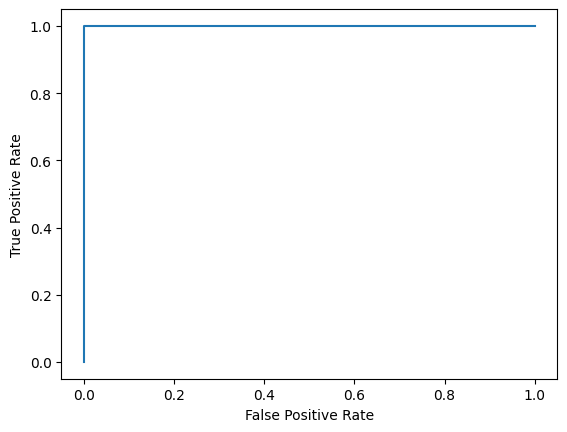

In [17]:
fpr, tpr, _ = metrics.roc_curve(Y2, y_pred_proba)

#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Несмотря на высокий показатель точности модели, необходимо помнить, что объём выборки составляет лишь 68 строк, следовательно нельзя говорить о том, что её можно применить на новом наборе данных.